# Principal Component Analysis (PCA)

In [16]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import time

## Visualizing the Demo Data

In [3]:
# demo data
# DO NOT CHANGE
X1 = np.random.normal(10, 5, 500)
X2 = np.random.normal(0, .75, 500)
data = np.vstack((X1, X2))
th = 27 * np.pi/100
R = np.array([[np.cos(th), -np.sin(th)],[np.sin(th), np.cos(th)]])
data = (R @ data).T

(500, 2)

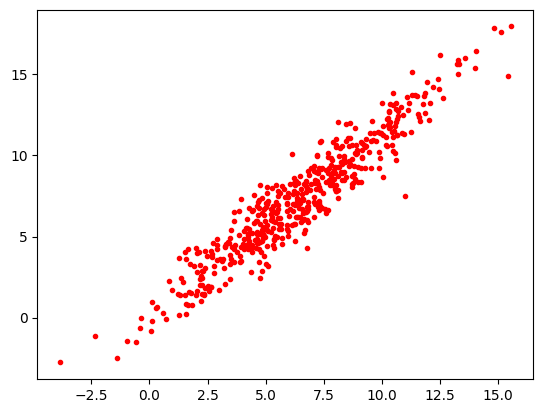

In [5]:
# visualize the data
# TODO: plot the data variable


## Compute the Covariance Matrix

$X$ is a matrix of data with $m$ rows and $n$ columns. Let $x^{(i)}$ denote the $i^{\text{th}}$ column of $X$. Let $x^{(j)}$ denote the $j^{\text{th}}$ column of $X$. The $(i,j)$ cell of the covariance matrix is computed as follows:
$$\text{cov}(X)_{i,j} = \frac{1}{m-1}\sum_{k=1}^{m}\left[\left(x_k^{(i)} - \bar{x}^{(i)}\right) \left(x_k^{(j)} - \bar{x}^{(j)}\right) \right]$$
You can normalize the matrix $X$ by subtracting the mean from each column using the following command: `X_meaned = X - np.mean(X , axis = 0)`


When $X$ is normalized like this, the covariance formula can be simplified as follows:
$$\text{cov}(\bar{X})_{i,j} = \frac{1}{m-1}\sum_{k=1}^{m} x_k^{(i)} x_k^{(j)}$$

In [13]:
def cov(X):
    '''
    Input: matrix X of size m x n
    Output: covariance matrix of size n x n
    
    The (i,j) cell of the output is computed as follows:
    '''
    # Step 1: Normalize X using the command given above

    
    # Step 2: Compute the covariance matrix using the second formula above
    
    return NotImplemented

array([[ 0.08140426, -0.00567114, -0.0017541 , -0.00152489],
       [-0.00567114,  0.09068415, -0.00324629, -0.00923463],
       [-0.0017541 , -0.00324629,  0.08427353,  0.00731624],
       [-0.00152489, -0.00923463,  0.00731624,  0.08222217]])

In [14]:
# Test your covariance function
# DO NOT CHANGE

X = np.random.rand(30, 100)
test = cov(X)
X = X - np.mean(X, axis = 0)
true = np.cov(X, rowvar=False)
np.allclose(true, test)

True

## Vector Projection

Let $x_1$ and $x_2$ be $n$-dimensional vectors. The projection coordinates of $x_1$ onto $x_2$ is computed as follows:
$$\frac{x_1 \cdot x_2}{\lVert x_2 \rVert}$$
The Python documentation for computing the norm of a vector can be found here: https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

In [15]:
def vec_proj(x1, x2):
    # Step 1: compute dot product of x1 and x2

    # Step 2: divide outcome by norm of x2 (norm is taken with respect to columns -- axis=0)

    return NotImplemented

Before projection:


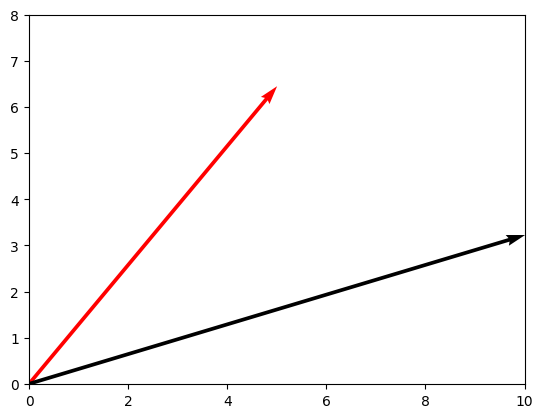

After projection:


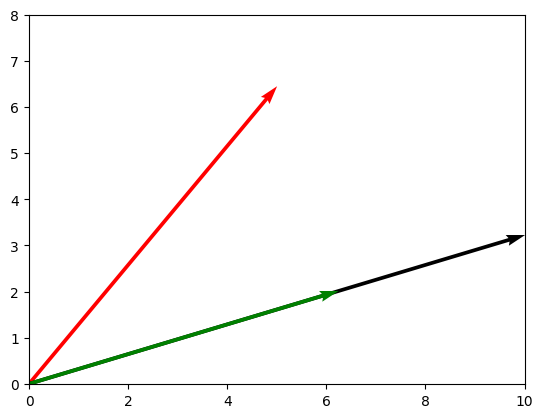

In [17]:
## DO NOT CHANGE

x1 = np.array([5,6])
x2 = np.array([10,3])
V = np.array([x1, x2])
origin = np.array([[0, 0],[0, 0]]) # origin point

print("Before projection:")
plt.quiver(*origin, V[:,0], V[:,1], color=['r','k'], scale=10)
plt.xlim((-0.01, 10))
plt.ylim((-0.01, 8))
plt.show()

proj_x1 = vec_proj(x1, x2) * x2 / np.linalg.norm(x2)

V = np.array([x1, x2, proj_x1])
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

print("After projection:")
plt.quiver(*origin, V[:,0], V[:,1], color=['r','k', 'g'], scale=10)
plt.xlim((-0.01, 10))
plt.ylim((-0.01, 8))
plt.show()

## Write Singular Value Decomposition (SVD) function

See the Python documentation for computing eigenvalues and eigenvectors: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

You can also use this function:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

In [32]:
def SVD(X , n):
    '''
    Input: X -- a matrix with m rows and n columns
    Input: n -- the number of principal components to use
    Output: project_X 
    Output: sorted_eigenvalues
    Output: sorted_eigenvectors
    '''
     
    #Step-1: normalize (subtract mean from each column using the line of code given above)
     
    #Step-2: compute covariance matrix
     
    #Step-3: obtain eigenvalues and eigenvectors

    #Step-4: sort eigenvalues and eigenvectors in descending order
    # Hint: use np.argsort(...)
     
    #Step-5: select the first n principal components (select the first n sorted eigenvectors)
     
    #Step-6: get the projection coordinates of the meaned data matrix onto the principal component subspace

    return NotImplemented

In [29]:
# SVD test function
# DO NOT CHANGE

from numpy.linalg import svd
n_cols = 5
X = np.random.rand(500,n_cols)
projected_X, sorted_vals, sorted_vecs = SVD(X, n_cols)
X = X - np.mean(X , axis = 0)
U, S, V = svd(X, full_matrices=False)
projected_X_true = U @ np.diag(S[:])
assert(np.allclose(np.abs(projected_X), np.abs(projected_X_true), atol=1e-8))
print('Success!')

[0.07257601 0.07697535 0.07960448 0.08994714 0.09186172]
Success!


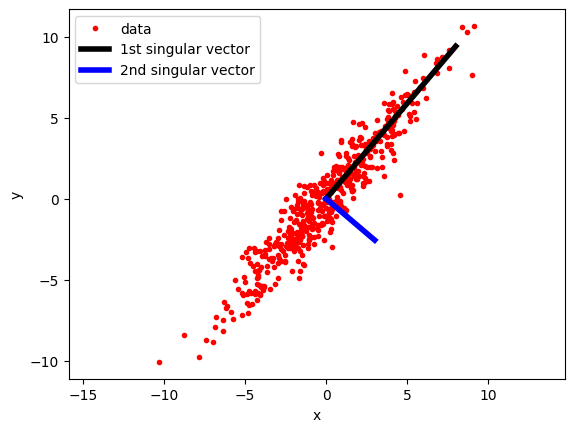

In [30]:
# Visualize principal components
# DO NOT CHANGE

X_meaned = data - np.mean(data , axis = 0)
cov_mat = np.cov(X_meaned, rowvar=False)

eigenvalues , eigenvectors = np.linalg.eigh(cov_mat)

v1 = eigenvectors[:,1]
v2 = eigenvectors[:,0]


m1 = v1[1] / v1[0]
m2 = v2[1] / v2[0]
xvals1 = np.linspace(0,8,100)
xvals2 = np.linspace(0,3,100)


plt.plot(X_meaned[:,0], X_meaned[:,1], 'r.', label='data')
plt.plot(xvals1, xvals1*m1, 'k', linewidth=4, label='1st singular vector')
plt.plot(xvals2, xvals2*m2, 'b', linewidth=4, label='2nd singular vector')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()
plt.show()

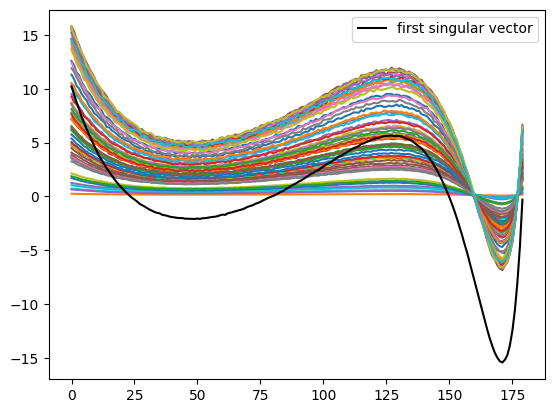

In [33]:
## Visualizing singular vectors
## DO NOT CHANGE
f = lambda x: 15*np.exp(-x/20.0) + np.exp(x/40.0) - np.exp((x-75)/20.0) + np.exp((x-125)/15.0) + np.exp((x-150)/7.0)
X = []
for i in range(60):
    row = []
    for j in range(180):
        row.append(f(j) + (1-2*np.random.rand()/6))
    X.append(np.random.rand() * np.array(row) + 0.2*np.random.rand())
X = np.array(X)
projected_X, sorted_vals, sorted_vecs = SVD(X.T, 1)
plt.plot(X.T)
plt.plot(.25*projected_X, 'k', label='first singular vector')
plt.legend()
plt.show()

## Applications of Singular Values - Explaining Variance

Singular values can be used to determine how much of the variance of the original dataset is explained by a low-dimensional approximation

Assume the singular values are sorted as follows: $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_n$. The variance explained by a $k$-dimensional approximation is computed as follows:
$$\text{variance explained} = \frac{\sum\limits_{i=1}^{k} \sigma_{i}}{\sum\limits_{i=1}^{n} \sigma_{i}}$$

In [6]:
def variance_explained(X, k):
    '''
    Input: X  -- A matrix with m rows and n columns
    Input: k  -- (integer) the number of singular values to be used in the low-dimensional SVD approximation
    Output: the percentage of the variance explained by a k-dimensional SVD approximation
    '''
    # Step 1: Compute SVD of X
    
    # Step 2: Compute numerator of the fraction above
    
    # Step 3: Compute denomenator of the fraction above
    
    # Step 4: Return numerator / denomenator
    return NotImplemented

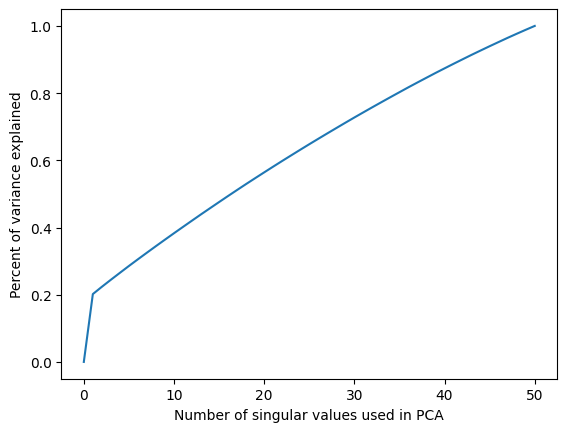

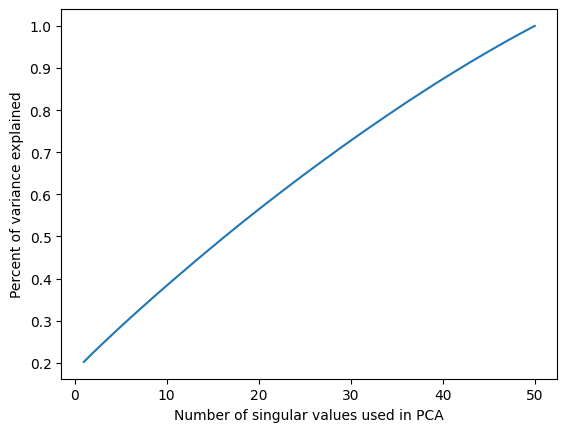

In [13]:
# Applying the PCA function
# DO NOT CHANGE

n_cols = 50
X = np.random.rand(500,n_cols)

# eigen_val_sum = np.sum(eigenvalues)
# total_of_eigen_vals = 0
percent_var_explained = []
for i in range(1, n_cols+1):
    percent_var_explained.append(variance_explained(X, i))

plt.plot(range(len(percent_var_explained) + 1), [0] + percent_var_explained)
plt.xlabel('Number of singular values used in PCA')
plt.ylabel('Percent of variance explained')
plt.show()

plt.plot(range(1, len(percent_var_explained) + 1), percent_var_explained)
plt.xlabel('Number of singular values used in PCA')
plt.ylabel('Percent of variance explained')
plt.show()

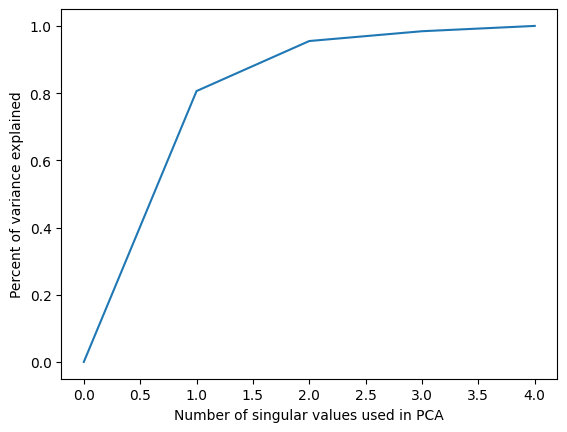

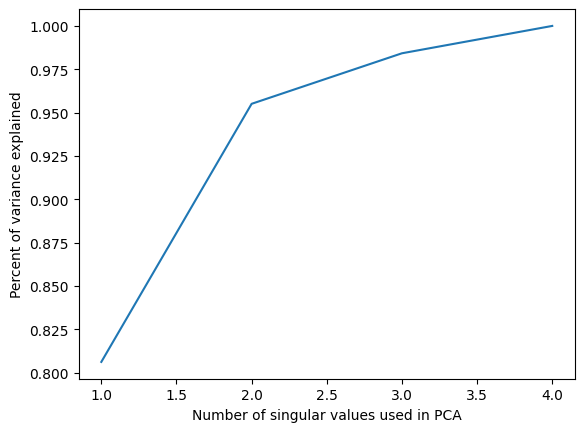

In [15]:
## Do this again with Iris dataset
# DO NOT CHANGE

#Load the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
#prepare the data
X = data.iloc[:,0:4]

# eigen_val_sum = np.sum(eigenvalues)
# total_of_eigen_vals = 0
percent_var_explained = []
for i in range(1, X.shape[1]+1):
    percent_var_explained.append(variance_explained(X, i))

plt.plot(range(len(percent_var_explained) + 1), [0] + percent_var_explained)
plt.xlabel('Number of singular values used in PCA')
plt.ylabel('Percent of variance explained')
plt.show()

plt.plot(range(1, len(percent_var_explained) + 1), percent_var_explained)
plt.xlabel('Number of singular values used in PCA')
plt.ylabel('Percent of variance explained')
plt.show()

## Applications of Singular Values - Matrix Reconstruction

Let $X$ denote a matrix containing data with $m$ rows and $n$ columns. The traditional SVD yields a decomposition of the form
$$X = U \Sigma V^T$$
where
$$U \in \mathbb{R}^{m \times n}$$
$$\Sigma \in \mathbb{R}^{n \times n}$$
$$V^{T} \in \mathbb{R}^{n \times n}$$
These three matrices can be obtained using the following line of code: `U, S, VT = svd(X, full_matrices=False)`

By default, $S$ will be a vector. If you want to do a $k$-dimensional approximation of $X$, only use the first $k$ values of $S$ and zero out the rest. For example, $S = [\sigma_1, \sigma_2, \sigma_3, ...\sigma_n]$. The $S$ you want for a $k$-dimensional approximation is $S_k = [\sigma_1, \sigma_2, \dots, \sigma_k, 0, 0, \dots, 0]$ where $\sigma_{k+1}, \sigma_{k_2},\dots,\sigma_n$ have been replaced by 0s. 

Then, turn the vector $S$ into matrix form by `Sk = np.diag(S)`.

The $k$-dimensional approximation is computed by $ U S_k V^{T} $.

Finally, the error of this approximation can be computed by $\lVert X - U S_k V^{T} \rVert$. See https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html for an example of how to use the norm function.

In [45]:
def approximation_error(X, k):
    '''
    Input: X  -- A matrix with m rows and n columns
    Input: k  -- (integer) the number of singular values to be used in the low-dimensional SVD approximation
    Output: (float) the error of the reconstructed X matrix 
    '''
    
    # Step 1: compute SVD of X using numpy svd to obtain U, S, and VT (set full_matrices=False)

    # Step 2: zero out the elements of S after the k-th singular value

    # Step 3: Convert S to a diagonal matrix

    # Step 4: compute the reduced rank approximation of X

    # Step 5: compute the norm of the difference between X and your reduced rank approximation of X
    
    return NotImplemented

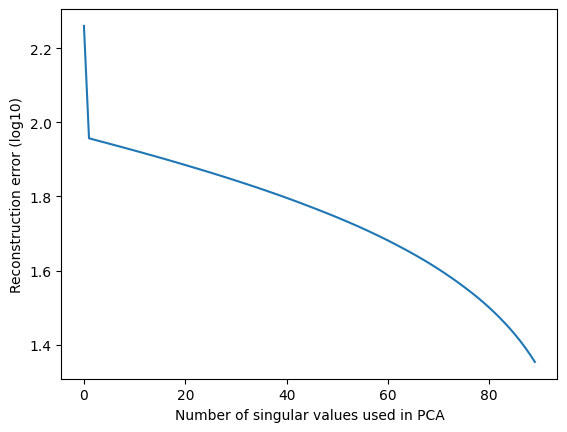

In [47]:
n_cols = 100
X = np.random.rand(1000,n_cols)
errors = []

for i in range(int(np.floor(.9 * n_cols))):
    errors.append(approximation_error(X, i))

    
plt.plot(np.log10(errors))
plt.xlabel('Number of singular values used in PCA')
plt.ylabel('Reconstruction error (log10)')
plt.show()

## Perform PCA on dataset

In [54]:
#Load the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
#prepare the data
X = data.iloc[:,0:4]
#prepare the labels
labels = data.iloc[:,4]

<AxesSubplot: xlabel='coord1', ylabel='coord2'>

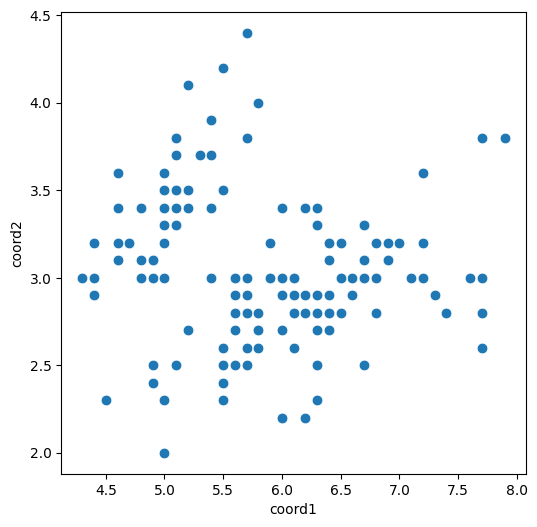

In [57]:
initial_df = pd.DataFrame(X.iloc[:, 0:2])
initial_df = pd.concat([initial_df , pd.DataFrame(labels)] , axis = 1)
initial_df.columns = ['coord1', 'coord2', 'classes']


plt.figure(figsize = (6,6))
# sb.scatterplot(data=initial_df , x='coord1', y='coord2' , hue='classes' , s=60 , palette='icefire')
sb.scatterplot(data=initial_df , x='coord1', y='coord2', s=60)
# plt.plot(X[:,0], X[:,1], 'k.')
# plt.show()

In [50]:
#Creating a Pandas DataFrame of reduced dataset

# Use your SVD function with 2 principal components
mat_reduced, sorted_eigenvalues, sorted_eigenvectors = SVD(X, 2)

# Create a pandas dataframe using the reduced matrix from the output of your SVD function. Label the columns 'PC1' and 'PC2'
principal_df = pd.DataFrame(mat_reduced, columns=['PC1', 'PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(labels)] , axis = 1)

principal_df.columns = ['PC1', 'PC2', 'classes']

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

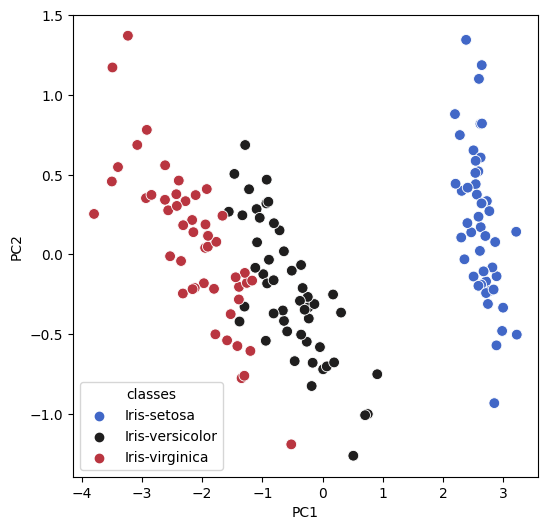

In [51]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'classes' , s = 60 , palette= 'icefire')

## PCA with labels

In [60]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,0:4]
labels = data.iloc[:,4]

# Engineer a new feature by squaring one of the columns of X

# Use your SVD function to perform PCA
mat_reduced, eigenvalues, eigenvectors = ...

principal_df_3_components = pd.DataFrame(mat_reduced , columns = ['PC1', 'PC2', 'PC3'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df_3_components , pd.DataFrame(labels)] , axis = 1)

principal_df.columns = ['PC1', 'PC2', 'PC3', 'classes']

In [64]:
# Create a train/test split using test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(...)

# Print the unique labels
print(...)

# Create training matrices for each class
X1 = ...
X2 = ...
X3 = ...

# The number of classes is equal to the number of unique labels
num_classes = 


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [65]:
thetas = np.linspace(0, 2*np.pi, num_classes + 1)[0:num_classes]
Y = np.vstack((np.cos(thetas), np.sin(thetas))).T
targets = np.zeros((len(y_train), 2))
# Set the mapping destinations
targets[...] = ...
targets[...] = ...
targets[...] = ...

The least squares documentation is here: https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

The output of the least squares function will be a list with several elements. The mapping we are looking for is in the 0th element.

In [67]:
# Use least squares to create a mapping from the representatives to locations in the plane
mapping = ...

/tmp/ipykernel_199/2234052118.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  mapping = np.linalg.lstsq(reps, Y)


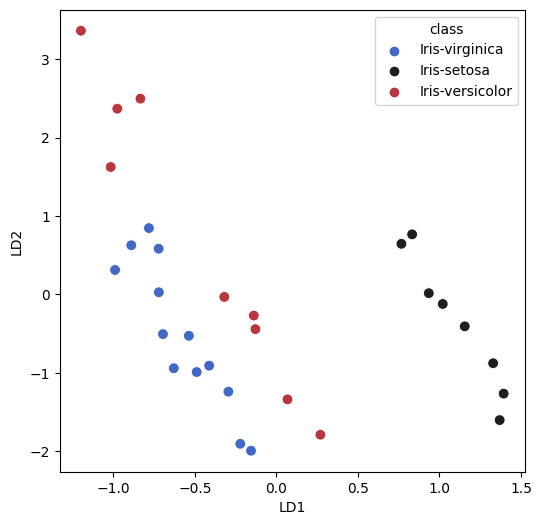

In [73]:
# Compute the supervised approximation using the mapping
approx = X_test @ mapping
lda_test_df = pd.DataFrame(np.column_stack([approx[:,0],approx[:,1], y_test]), columns=['LD1','LD2','class'])

plt.figure(figsize = (6,6))
sb.scatterplot(data = lda_test_df , x = 'LD1',y = 'LD2' , hue = 'class' , s = 60 , palette= 'icefire')
plt.show()

In [ ]:
# Compute the supervised approximation using the mapping
approx = mat_reduced @ mapping
lda_test_df = pd.DataFrame(np.column_stack([approx[:,0],approx[:,1], labels]), columns=['LD1','LD2','class'])

plt.figure(figsize = (6,6))
sb.scatterplot(data = lda_test_df , x = 'LD1',y = 'LD2' , hue = 'class' , s = 60 , palette= 'icefire')
plt.show()